In [ ]:
!cd /content/drive/MyDrive/MachineLearning/CapstoneProject

In [ ]:
!ls '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images'

In [ ]:
!ls '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Jeep Liberty SUV 2012' | head -3

00119.jpg
00299.jpg
00343.jpg


In [ ]:
import tensorflow as tf
#importing required package - data manipulation, Image display and Image processing
import numpy as np
import pandas as pd
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
#Load an image using Keras image class
image_file =  "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Jeep Liberty SUV 2012/00119.jpg"
sample_car_image = tf.keras.preprocessing.image.load_img(image_file)

In [ ]:
type(sample_car_image)

PIL.JpegImagePlugin.JpegImageFile

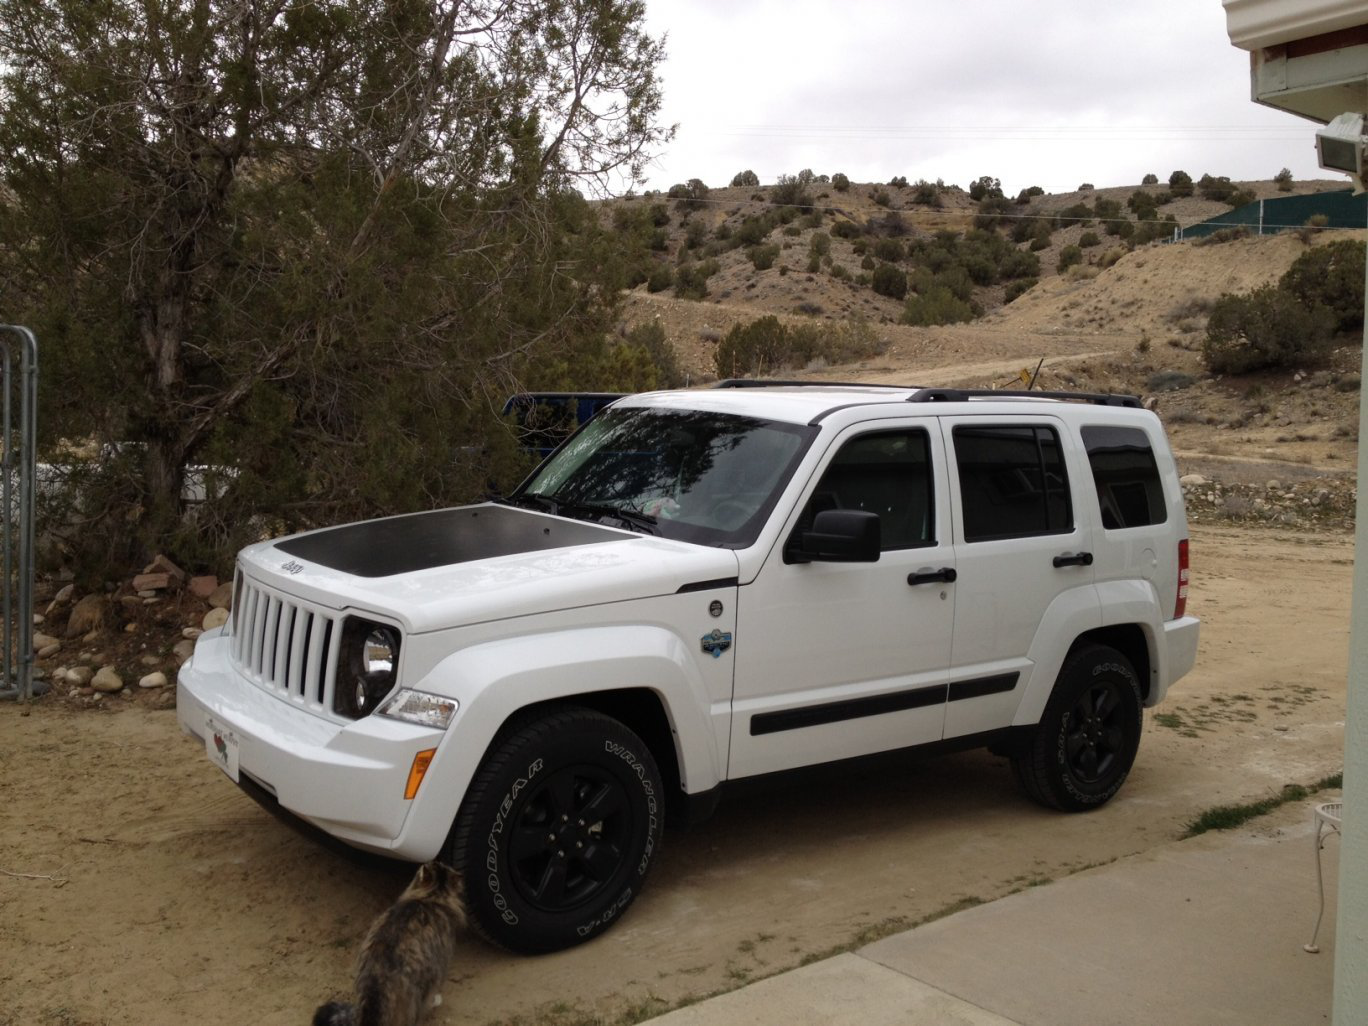

In [ ]:
#Inspect image
sample_car_image

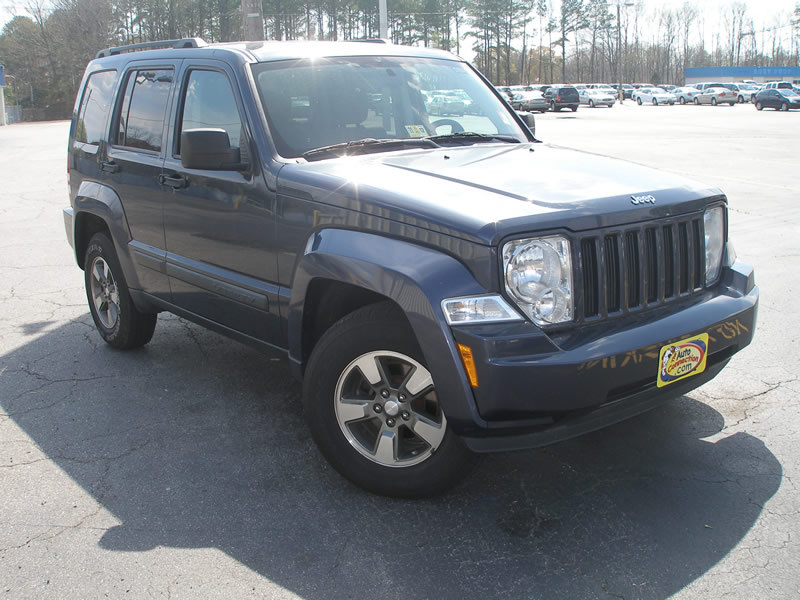

In [ ]:
#Load another photograph
sample_car_image2 = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Jeep Liberty SUV 2012/00343.jpg')
sample_car_image2

In [ ]:
!head '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Train Annotations.csv'

Image Name,Bounding Box coordinates,,,,Image class
00001.jpg,39,116,569,375,14
00002.jpg,36,116,868,587,3
00003.jpg,85,109,601,381,91
00004.jpg,621,393,1484,1096,134
00005.jpg,14,36,133,99,106
00006.jpg,259,289,515,416,123
00007.jpg,88,80,541,397,89
00008.jpg,73,79,591,410,96
00009.jpg,20,126,1269,771,167


In [ ]:
import pandas as pd
annotations_df = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Train Annotations.csv")
annotations_df.rename(columns = {'Bounding Box coordinates':'X1'}, inplace = True)
annotations_df.rename(columns = {'Unnamed: 2':'X2'}, inplace = True)
annotations_df.rename(columns = {'Unnamed: 3':'Y1'}, inplace = True)
annotations_df.rename(columns = {'Unnamed: 4':'Y2'}, inplace = True)
annotations_df.rename(columns = {'Image class':'Image_class'}, inplace = True)
annotations_df.rename(columns = {'Image Name':'Image_Name'}, inplace = True)
annotations_df

Image_Name   X1   X2    Y1    Y2  Image_class
0     00001.jpg   39  116   569   375           14
1     00002.jpg   36  116   868   587            3
2     00003.jpg   85  109   601   381           91
3     00004.jpg  621  393  1484  1096          134
4     00005.jpg   14   36   133    99          106
...         ...  ...  ...   ...   ...          ...
8139  08140.jpg    3   44   423   336           78
8140  08141.jpg  138  150   706   523          196
8141  08142.jpg   26  246   660   449          163
8142  08143.jpg   78  526  1489   908          112
8143  08144.jpg   20  240   862   677           17

[8144 rows x 6 columns]

In [ ]:
# carnamesandmake_df = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car names and make.csv")
# carnamesandmake_df

In [ ]:
#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
mypath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/"
#reading png files in the path
ll = glob.glob(mypath + "Car Images//Train Images/*/*")
print(ll)

ll1 = []
for fileandFolder in ll:
  ll2 = fileandFolder.split("/")[-2:]
  ll1.append(ll2)

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/02344.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/01431.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/07067.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/01853.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/05376.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/03613.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/Volvo 240 Sedan 1993/04538.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/C

In [ ]:
ll1

[['Volvo 240 Sedan 1993', '02344.jpg'],
 ['Volvo 240 Sedan 1993', '01431.jpg'],
 ['Volvo 240 Sedan 1993', '07067.jpg'],
 ['Volvo 240 Sedan 1993', '01853.jpg'],
 ['Volvo 240 Sedan 1993', '05376.jpg'],
 ['Volvo 240 Sedan 1993', '03613.jpg'],
 ['Volvo 240 Sedan 1993', '04538.jpg'],
 ['Volvo 240 Sedan 1993', '07900.jpg'],
 ['Volvo 240 Sedan 1993', '06260.jpg'],
 ['Volvo 240 Sedan 1993', '03345.jpg'],
 ['Volvo 240 Sedan 1993', '01015.jpg'],
 ['Volvo 240 Sedan 1993', '07702.jpg'],
 ['Volvo 240 Sedan 1993', '06127.jpg'],
 ['Volvo 240 Sedan 1993', '05292.jpg'],
 ['Volvo 240 Sedan 1993', '01992.jpg'],
 ['Volvo 240 Sedan 1993', '01814.jpg'],
 ['Volvo 240 Sedan 1993', '00455.jpg'],
 ['Volvo 240 Sedan 1993', '02051.jpg'],
 ['Volvo 240 Sedan 1993', '00047.jpg'],
 ['Volvo 240 Sedan 1993', '04215.jpg'],
 ['Volvo 240 Sedan 1993', '05625.jpg'],
 ['Volvo 240 Sedan 1993', '01908.jpg'],
 ['Volvo 240 Sedan 1993', '00285.jpg'],
 ['Volvo 240 Sedan 1993', '02067.jpg'],
 ['Volvo 240 Sedan 1993', '07633.jpg'],


In [ ]:
df = pd.DataFrame(ll1, columns = ['carName','imageName'])
df['carModel'] = df['carName'].str[-4:]
df['carModel_1'] = df['carName'].str[:-4]
df[['carName','carModel','carModel_1','imageName']]

carName carModel            carModel_1  imageName
0         Volvo 240 Sedan 1993     1993      Volvo 240 Sedan   02344.jpg
1         Volvo 240 Sedan 1993     1993      Volvo 240 Sedan   01431.jpg
2         Volvo 240 Sedan 1993     1993      Volvo 240 Sedan   07067.jpg
3         Volvo 240 Sedan 1993     1993      Volvo 240 Sedan   01853.jpg
4         Volvo 240 Sedan 1993     1993      Volvo 240 Sedan   05376.jpg
...                        ...      ...                   ...        ...
8139  Volvo C30 Hatchback 2012     2012  Volvo C30 Hatchback   06111.jpg
8140  Volvo C30 Hatchback 2012     2012  Volvo C30 Hatchback   07373.jpg
8141  Volvo C30 Hatchback 2012     2012  Volvo C30 Hatchback   07454.jpg
8142  Volvo C30 Hatchback 2012     2012  Volvo C30 Hatchback   06442.jpg
8143  Volvo C30 Hatchback 2012     2012  Volvo C30 Hatchback   05438.jpg

[8144 rows x 4 columns]

In [ ]:
dfMerged = df.merge(annotations_df, how='inner', left_on='imageName', right_on='Image_Name')
dfMerged

carName  imageName carModel  ...    Y1   Y2  Image_class
0         Volvo 240 Sedan 1993  02344.jpg     1993  ...  1279  329          194
1         Volvo 240 Sedan 1993  01431.jpg     1993  ...   779  462          194
2         Volvo 240 Sedan 1993  07067.jpg     1993  ...  1247  732          194
3         Volvo 240 Sedan 1993  01853.jpg     1993  ...   999  763          194
4         Volvo 240 Sedan 1993  05376.jpg     1993  ...   772  514          194
...                        ...        ...      ...  ...   ...  ...          ...
8139  Volvo C30 Hatchback 2012  06111.jpg     2012  ...   407  327          193
8140  Volvo C30 Hatchback 2012  07373.jpg     2012  ...   419  272          193
8141  Volvo C30 Hatchback 2012  07454.jpg     2012  ...   451  235          193
8142  Volvo C30 Hatchback 2012  06442.jpg     2012  ...   477  289          193
8143  Volvo C30 Hatchback 2012  05438.jpg     2012  ...   461  296          193

[8144 rows x 10 columns]

In [ ]:
dfMerged[dfMerged['carName'] == 'Jeep Liberty SUV 2012']
#/00275.jpg

carName  imageName carModel  ...    Y1    Y2  Image_class
6344  Jeep Liberty SUV 2012  06909.jpg     2012  ...   591   421          147
6345  Jeep Liberty SUV 2012  02779.jpg     2012  ...   593   309          147
6346  Jeep Liberty SUV 2012  06141.jpg     2012  ...   917   763          147
6347  Jeep Liberty SUV 2012  05637.jpg     2012  ...   905   644          147
6348  Jeep Liberty SUV 2012  07318.jpg     2012  ...   846   617          147
6349  Jeep Liberty SUV 2012  00545.jpg     2012  ...  2040  1468          147
6350  Jeep Liberty SUV 2012  05286.jpg     2012  ...  1653  1057          147
6351  Jeep Liberty SUV 2012  05850.jpg     2012  ...   576   480          147
6352  Jeep Liberty SUV 2012  00394.jpg     2012  ...   624   345          147
6353  Jeep Liberty SUV 2012  00119.jpg     2012  ...  1207   960          147
6354  Jeep Liberty SUV 2012  07293.jpg     2012  ...   878   654          147
6355  Jeep Liberty SUV 2012  07088.jpg     2012  ...  1007   748          147
6356  Jeep Liberty SUV 2012  03966.jpg     2012  ...   733   449          147
6357  Jeep Liberty SUV 2012  04242.jpg     2012  ...  2212  1429          147
6358  Jeep Liberty SUV 2012  06700.jpg     2012  ...   790   395          147
6359  Jeep Liberty SUV 2012  07617.jpg     2012  ...   659   436          147
6360  Jeep Liberty SUV 2012  06753.jpg     2012  ...  1005   658          147
6361  Jeep Liberty SUV 2012  07771.jpg     2012  ...   684   537          147
6362  Jeep Liberty SUV 2012  01223.jpg     2012  ...   886   767          147
6363  Jeep Liberty SUV 2012  00343.jpg     2012  ...   760   504          147
6364  Jeep Liberty SUV 2012  00299.jpg     2012  ...   982   711          147
6365  Jeep Liberty SUV 2012  04654.jpg     2012  ...  1680  1078          147
6366  Jeep Liberty SUV 2012  04763.jpg     2012  ...   996   594          147
6367  Jeep Liberty SUV 2012  06961.jpg     2012  ...  1648  1065          147
6368  Jeep Liberty SUV 2012  02747.jpg     2012  ...   911   656          147
6369  Jeep Liberty SUV 2012  04922.jpg     2012  ...   654   352          147
6370  Jeep Liberty SUV 2012  08039.jpg     2012  ...  1664  1262          147
6371  Jeep Liberty SUV 2012  04093.jpg     2012  ...  1431   993          147
6372  Jeep Liberty SUV 2012  06732.jpg     2012  ...   681   412          147
6373  Jeep Liberty SUV 2012  06331.jpg     2012  ...   494   298          147
6374  Jeep Liberty SUV 2012  07038.jpg     2012  ...   578   369          147
6375  Jeep Liberty SUV 2012  02403.jpg     2012  ...   670   321          147
6376  Jeep Liberty SUV 2012  03806.jpg     2012  ...   957   729          147
6377  Jeep Liberty SUV 2012  07902.jpg     2012  ...   835   712          147
6378  Jeep Liberty SUV 2012  03704.jpg     2012  ...   934   602          147
6379  Jeep Liberty SUV 2012  06679.jpg     2012  ...   594   428          147
6380  Jeep Liberty SUV 2012  02108.jpg     2012  ...   993   553          147
6381  Jeep Liberty SUV 2012  04115.jpg     2012  ...   593   410          147
6382  Jeep Liberty SUV 2012  06639.jpg     2012  ...   948   675          147
6383  Jeep Liberty SUV 2012  04134.jpg     2012  ...   683   392          147
6384  Jeep Liberty SUV 2012  05900.jpg     2012  ...  1003   746          147
6385  Jeep Liberty SUV 2012  07532.jpg     2012  ...   702   429          147
6386  Jeep Liberty SUV 2012  05627.jpg     2012  ...  1192   781          147
6387  Jeep Liberty SUV 2012  07200.jpg     2012  ...  1013   733          147
6388  Jeep Liberty SUV 2012  03727.jpg     2012  ...   556   343          147

[45 rows x 10 columns]

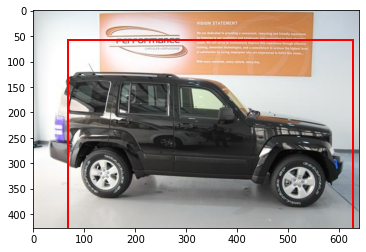

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

x0 = 11
x1 = 23
y0 = 141
y1 = 80 

#11	23	141	80	

filename = '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg'
unscaled = cv2.imread(filename)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
#(x0, y0), x1 - x0, y1 - y0
# rect = patches.Rectangle((165,183),358,495, linewidth=2, edgecolor='r', facecolor='none')
rect = patches.Rectangle((67,57),560,411, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

In [ ]:
img_size=196
#Build training generator. 
train_generator = img_generator.flow_from_directory("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/",
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=32)

#Build test generator
test_generator = img_generator.flow_from_directory("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/",
                                                   target_size=(img_size, img_size),                                                   
                                                   subset='validation',
                                                   batch_size=32)

Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.


In [ ]:
# #Build test generator
# test_generator = img_generator.flow_from_directory("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/TestImagesFrom_desktop/drive-download-20211202T030052Z-001/",
#                                                    target_size=(img_size, img_size),                                                   
#                                                    subset='validation')

In [ ]:
X_train, y_train = next(train_generator)

print('Input features shape', X_train.shape)
print('Actual labels shape', y_train.shape)

Input features shape (32, 196, 196, 3)
Actual labels shape (32, 196)


In [ ]:
X_test, y_test = next(test_generator)

print('Input features shape', X_test.shape)
print('Actual labels shape', y_test.shape)

Input features shape (32, 196, 196, 3)
Actual labels shape (32, 196)


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# import tensorflow as tf

# #Clear any previous model from memory
# tf.keras.backend.clear_session()

# #Initialize model
# model = tf.keras.models.Sequential()



# #normalize data
# model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# # model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.GlobalAvgPool2D())
# model.add(tf.keras.layers.Dropout(0.15))
# model.add(tf.keras.layers.Dense(4096, activation='relu'))
# # model.add(tf.keras.layers.Dense(4096, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.15))
# model.add(tf.keras.layers.Dense(1000, activation='relu'))

# #Add Dropout
# model.add(tf.keras.layers.Dropout(0.15))

# #Add Output Layer
# model.add(tf.keras.layers.Dense(196, activation='softmax'))
# #Specify Loass and Optimizer
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# #Model Summary
# model.summary()

In [ ]:
# # Found 522 images belonging to 16 classes.
# # Found 122 images belonging to 16 classes.
# #Saving the best model using model checkpoint callback
# model_checkpoint=tf.keras.callbacks.ModelCheckpoint('cars_vgg_cnn.h5', #where to save the model
#                                                     save_best_only=True, 
#                                                     monitor='val_accuracy', 
#                                                     mode='max', 
#                                                     verbose=1)

In [ ]:
# model.fit(train_generator,
#           epochs=200,
#           steps_per_epoch= 636//32,  #Number of training images//batch_size
#           validation_data=test_generator,
#           validation_steps = 149//32, #Number of test images//batch_size
#           callbacks = [model_checkpoint])

In [ ]:
# abcd

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (img_size, img_size, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

for i, layer in enumerate(base_model.layers):
  print(i, layer.name, "-", layer.trainable)

# Print current trainable map:
print(base_model._get_trainable_state())

0 input_1 - False
1 conv2d_13 - False
2 batch_normalization_2 - False
3 activation - False
4 conv2d_14 - False
5 batch_normalization_3 - False
6 activation_1 - False
7 conv2d_15 - False
8 batch_normalization_4 - False
9 activation_2 - False
10 max_pooling2d_5 - False
11 conv2d_16 - False
12 batch_normalization_5 - False
13 activation_3 - False
14 conv2d_17 - False
15 batch_normalization_6 - False
16 activation_4 - False
17 max_pooling2d_6 - False
18 conv2d_21 - False
19 batch_normalization_10 - False
20 activation_8 - False
21 conv2d_19 - False
22 conv2d_22 - False
23 batch_normalization_8 - False
24 batch_normalization_11 - False
25 activation_6 - False
26 activation_9 - False
27 average_pooling2d - False
28 conv2d_18 - False
29 conv2d_20 - False
30 conv2d_23 - False
31 conv2d_24 - False
32 batch_normalization_7 - False
33 batch_normalization_9 - False
34 batch_normalization_12 - False
35 batch_normalization_13 - False
36 activation_5 - False
37 activation_7 - False
38 activation_10 -

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers 
from tensorflow.keras import Model 

# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPool2D()(base_model.output)
x = layers.BatchNormalization()(x)
x = layers.Dense(4096, activation='relu', kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(4096, activation='relu', kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1000, activation='relu', kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
# Add a final sigmoid layer for classification
x = layers.Dense(196, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 97, 97, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 97, 97, 32)  96          ['conv2d_13[0][0]']              
 rmalization)                                                                                     
                                                                                              

In [ ]:
# define the checkpoint
checkpoint_path = './'
# checkpoint_dir = os.path.dirname(checkpoint_path)
filepath =  checkpoint_path + "cars_model_inc_intem.h5"

checkpoint =  tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
# inchist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 32, epochs = 50, callbacks = [checkpoint])
model.fit(train_generator,
          epochs=200,
          steps_per_epoch= 6598//32,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 1546//32 #Number of test images//batch_size
          )

#callbacks = [model_checkpoint]

# Found 6598 images belonging to 196 classes.
# Found 1546 images belonging to 196 classes

Epoch 1/200
206/206 [==============================] - 128s 594ms/step - loss: 7.8860 - acc: 0.0061 - val_loss: 5.8388 - val_acc: 0.0046
Epoch 2/200
206/206 [==============================] - 120s 584ms/step - loss: 5.3357 - acc: 0.0064 - val_loss: 5.3057 - val_acc: 0.0072
Epoch 3/200
206/206 [==============================] - 119s 576ms/step - loss: 5.2879 - acc: 0.0085 - val_loss: 5.3174 - val_acc: 0.0091
Epoch 4/200
206/206 [==============================] - 119s 578ms/step - loss: 5.2693 - acc: 0.0073 - val_loss: 5.2661 - val_acc: 0.0072
Epoch 5/200
206/206 [==============================] - 119s 577ms/step - loss: 5.2651 - acc: 0.0099 - val_loss: 5.2983 - val_acc: 0.0065
Epoch 6/200
206/206 [==============================] - 119s 580ms/step - loss: 5.2537 - acc: 0.0094 - val_loss: 5.2767 - val_acc: 0.0052
Epoch 7/200
206/206 [==============================] - 119s 579ms/step - loss: 5.2436 - acc: 0.0110 - val_loss: 5.2582 - val_acc: 0.0130
Epoch 8/200
206/206 [====================

KeyboardInterrupt: ignored

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt


# mypath="/content/drive/My Drive/Machine learning/ComputerVision/Project-1/train"
base_dir_train = "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/"
base_dir_validation = "/content/drive/My Drive/Machine learning/ComputerVision/Project-1/"
train_dir = os.path.join(base_dir_train, 'Train Images')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, class_mode = 'categorical', target_size = (299, 299), subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, class_mode = 'categorical', target_size = (299, 299), subset='validation')



Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (299, 299, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

for i, layer in enumerate(base_model.layers):
  print(i, layer.name, "-", layer.trainable)

# Print current trainable map:
print(base_model._get_trainable_state())

0 input_6 - False
1 conv2d_483 - False
2 batch_normalization_496 - False
3 activation_470 - False
4 conv2d_484 - False
5 batch_normalization_497 - False
6 activation_471 - False
7 conv2d_485 - False
8 batch_normalization_498 - False
9 activation_472 - False
10 max_pooling2d_25 - False
11 conv2d_486 - False
12 batch_normalization_499 - False
13 activation_473 - False
14 conv2d_487 - False
15 batch_normalization_500 - False
16 activation_474 - False
17 max_pooling2d_26 - False
18 conv2d_491 - False
19 batch_normalization_504 - False
20 activation_478 - False
21 conv2d_489 - False
22 conv2d_492 - False
23 batch_normalization_502 - False
24 batch_normalization_505 - False
25 activation_476 - False
26 activation_479 - False
27 average_pooling2d_45 - False
28 conv2d_488 - False
29 conv2d_490 - False
30 conv2d_493 - False
31 conv2d_494 - False
32 batch_normalization_501 - False
33 batch_normalization_503 - False
34 batch_normalization_506 - False
35 batch_normalization_507 - False
36 activati

In [ ]:
from tensorflow.keras.optimizers import Adam

# Flatten the output layer to 1 dimension
x = layers.GlobalAvgPool2D()(base_model.output)
x = layers.BatchNormalization()(x)
x = layers.Dense(4096, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.30)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(2048, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.20)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1000, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.10)(x)
x = layers.BatchNormalization()(x)
# Add a final sigmoid layer for classification
x = layers.Dense(196, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_483 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_496 (Batch  (None, 149, 149, 32  96         ['conv2d_483[0][0]']             
 Normalization)                 )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# define the checkpoint
checkpoint_path = './'
# checkpoint_dir = os.path.dirname(checkpoint_path)
filepath =  checkpoint_path + "model_inc_intem.h5"

checkpoint =  tf.keras.callbacks.ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
inchist = model.fit(train_generator, validation_data = validation_generator, epochs = 400, callbacks = [checkpoint])

Epoch 1/400
207/207 [==============================] - ETA: 0s - loss: 6.7058 - acc: 0.0288
Epoch 00001: acc improved from inf to 0.02880, saving model to ./model_inc_intem.h5
207/207 [==============================] - 204s 966ms/step - loss: 6.7058 - acc: 0.0288 - val_loss: 4.6792 - val_acc: 0.0317
Epoch 2/400
207/207 [==============================] - ETA: 0s - loss: 4.2946 - acc: 0.0677
Epoch 00002: acc did not improve from 0.02880
207/207 [==============================] - 196s 945ms/step - loss: 4.2946 - acc: 0.0677 - val_loss: 4.0330 - val_acc: 0.0809
Epoch 3/400
207/207 [==============================] - ETA: 0s - loss: 3.9181 - acc: 0.1009
Epoch 00003: acc did not improve from 0.02880
207/207 [==============================] - 195s 943ms/step - loss: 3.9181 - acc: 0.1009 - val_loss: 3.9585 - val_acc: 0.1184
Epoch 4/400
207/207 [==============================] - ETA: 0s - loss: 3.7305 - acc: 0.1279
Epoch 00004: acc did not improve from 0.02880
207/207 [==========================